In [138]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

#regress stat
from scipy import stats
import seaborn as sn

In [66]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = session.query(Measurement.date,Measurement.tobs).\
    filter(extract("month", Measurement.date)==6).all()

In [5]:
#  3. Convert the June temperatures to a list.
temps = list(np.ravel(june))

In [6]:
df = pd.DataFrame(temps)
# Sort the dataframe by date

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temps_df = pd.DataFrame(june, columns = ["Date", "Temperature"])

In [148]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temps_df.describe()

,Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [10]:
temps_df["Date"] = pd.to_datetime(temps_df["Date"])

In [17]:
temps_df.set_index(temps_df["Date"], inplace = True)

,Date,Temperature,bins
Date,,,
2010-06-01,2010-06-01,78.0,80
2010-06-02,2010-06-02,76.0,80
2010-06-03,2010-06-03,78.0,80
2010-06-04,2010-06-04,76.0,80
2010-06-05,2010-06-05,77.0,80
...,...,...,...
2017-06-26,2017-06-26,79.0,80
2017-06-27,2017-06-27,74.0,75
2017-06-28,2017-06-28,74.0,75


(14610.0, 17532.0)

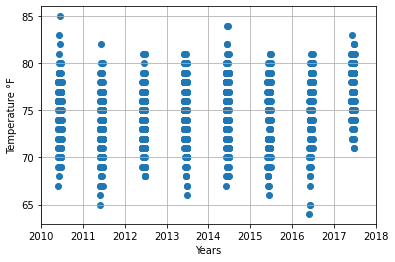

In [43]:
plt.scatter(x = temps_df["Date"], y = temps_df["Temperature"])
plt.grid()
plt.ylabel("Temperature °F")
plt.xlabel("Years")
plt.xlim(pd.to_datetime("2010-01-01"), pd.to_datetime("2018-01-01"))

## D2: Determine the Summary Statistics for December

In [42]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = session.query(Measurement.date,Measurement.tobs).\
    filter(extract("month", Measurement.date)==12).all()

In [43]:
date = session.query(Measurement.date).\
    filter(extract("month", Measurement.date)==12).all()

In [44]:
# 7. Convert the December temperatures to a list.
december_list = np.ravel(december)

In [46]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december, columns = ["Date", "Temperature"])

In [149]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [ ]:
december_df["Date"] = pd.to_datetime(december_df["Date"])

(14610.0, 17532.0)

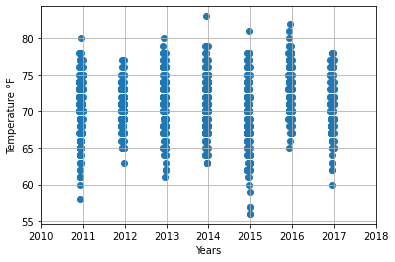

In [44]:

plt.scatter(x = december_df["Date"], y = december_df["Temperature"])
plt.grid()
plt.ylabel("Temperature °F")
plt.xlabel("Years")
plt.xlim(pd.to_datetime("2010-01-01"), pd.to_datetime("2018-01-01"))


In [ ]:
###Adding graphs to get visual for better temperature

In [39]:
june_graph = pd.DataFrame(temps_df, columns = ["Temperature"])

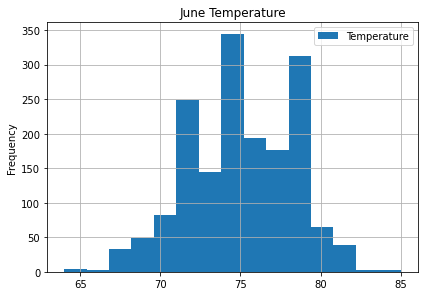

In [57]:
june_graph.plot.hist(bins=15)
plt.tight_layout()
plt.title("June Temperature")
plt.grid()

In [53]:
december_df

,Date,Temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [54]:
december_graph = pd.DataFrame(december_df, columns = ["Temperature"])

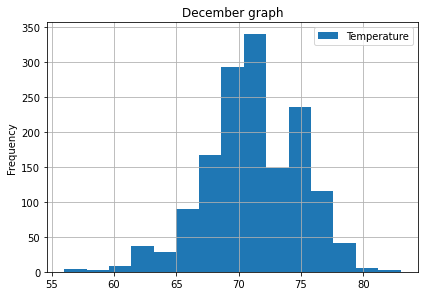

In [56]:
december_graph.plot.hist(bins= 15)
plt.tight_layout()
plt.title("December graph")
plt.grid()

In [78]:
### adding precipitation data
##new query
temp_prcp_june = session.query(Measurement.tobs, Measurement.prcp).filter(extract("month", Measurement.date)==6).all()
temp_prcp_december = session.query(Measurement.tobs, Measurement.prcp).filter(extract("month", Measurement.date)==12).all()

In [95]:
#create df
tem_prcp_j = pd.DataFrame(temp_prcp_june,columns= ["tobs","prcp"])
temp_prcp_d = pd.DataFrame(temp_prcp_december,columns= ["tobs","prcp"])
tem_prcp_j.describe()
#it has NA so need to drop them to be able to continue


,tobs,prcp
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [96]:
tem_prcp_j =tem_prcp_j.dropna()
tem_prcp_j.describe()

,tobs,prcp
count,1574.000000,1574.000000
mean,74.887548,0.136360
std,3.255695,0.335731
min,65.000000,0.000000
25%,72.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [122]:
#check december for na
temp_prcp_d.describe()
#has NA drop them
temp_prcp_d = temp_prcp_d.dropna()
.describe()

,tobs,prcp
count,1405.000000,1405.000000
mean,70.930249,0.216819
std,3.741578,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,81.000000,6.420000


In [112]:
x = tem_prcp_j["prcp"]

Text(2.5, 80, 'y = -0.04x + 2.88')

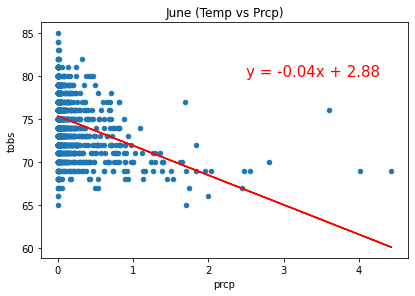

In [116]:
#create graph for june and add regression to see tendency
tem_prcp_j.plot.scatter("prcp","tobs")
plt.tight_layout()
plt.title("June (Temp vs Prcp)")
res = stats.linregress(tem_prcp_j["prcp"],tem_prcp_j["tobs"])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, res.intercept + res.slope*x,"r")
plt.annotate(line_eq, (2.5,80), fontsize=15, color="red")

In [127]:
x2 = temp_prcp_d["prcp"]
x2

0       0.04
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
1512    0.14
1513    0.14
1514    1.03
1515    2.37
1516    0.90
Name: prcp, Length: 1405, dtype: float64

In [132]:
res2

LinregressResult(slope=-0.8887343031672365, intercept=71.12294315357569, rvalue=-0.1285982095707459, pvalue=1.3241697162274447e-06, stderr=0.1829730334346877, intercept_stderr=0.10667735005419321)

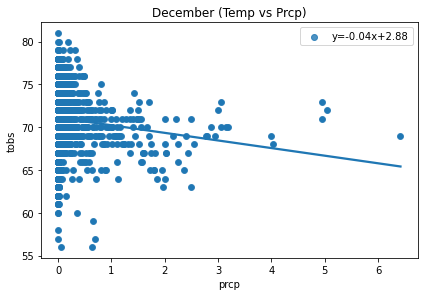

In [147]:
#create graph for december and add regression to see tendency
temp_prcp_d.plot.scatter("prcp","tobs")
plt.tight_layout()
plt.title("December (Temp vs Prcp)")

sn.regplot(x='prcp', y='tobs', data=temp_prcp_d, ci=None, label="y={0:.2f}x+{1:.2f}".format(slope,intercept)).legend(loc="best")
